# Keras Classification Code Along

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

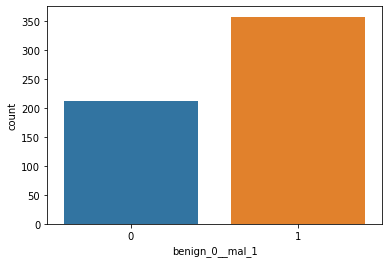

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

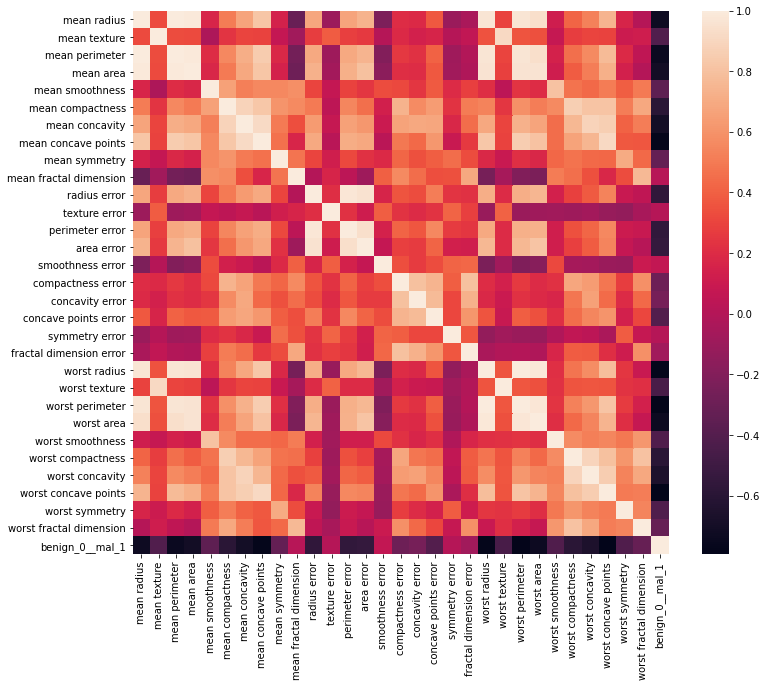

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

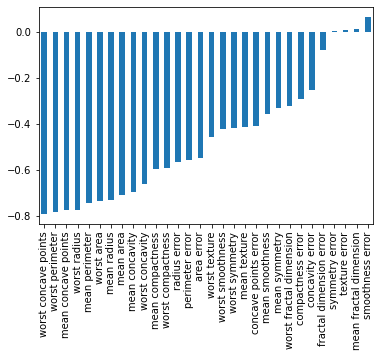

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Scaling / Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

## Creating the Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
X_train.shape

(426, 30)

In [19]:
X_test.shape

(143, 30)

In [21]:
y_train.shape

(426,)

In [22]:
y_test.shape

(143,)

In [24]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

## Training the Model

### Example One:  Using too many epochs and causing overfitting

In [25]:
model.fit(x=X_train, y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6616 - val_loss: 0.6439
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6276 - val_loss: 0.6065
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5893 - val_loss: 0.5666
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5502 - val_loss: 0.5245
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5074 - val_loss: 0.4796
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4640 - val_loss: 0.4336
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4187 - val_loss: 0.3879
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3767 - val_loss: 0.3444
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3379 - val_loss: 0.3068
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3085 - val_loss: 0.2777
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0593 - val_loss: 0.0851
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0651 - val_loss: 0.0927
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0558 - val_loss: 0.0920
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0605 - val_loss: 0.0914
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0610 - val_loss: 0.0830
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0588 - val_loss: 0.0911
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0489 - val_loss: 0.0865
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0974
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.0858
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.0902
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0999
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0412 - val_loss: 0.1058
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.1047
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0430 - val_loss: 0.1070
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0450 - val_loss: 0.0978
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.1029
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.1079
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.1000
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.1097
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.1140
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 0.1170
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0331 - val_loss: 0.1074
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0344 - val_loss: 0.1160
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0338 - val_loss: 0.1143
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.1084
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.1090
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0316 - val_loss: 0.1070
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.1157
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.1045
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.1137
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.1125
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.1185
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.1239
Epoch 329/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0313 - val_loss: 0.1144
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0288 - val_loss: 0.1118
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1206
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0256 - val_loss: 0.1118
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.1204
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.1132
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.1204
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0216 - val_loss: 0.1267
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1214
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.1490
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.1200
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.1302
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.1340
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.1261
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.1608
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.1213
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1341
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.1572
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.1315
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1324
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.1335
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.1398
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.1344
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.1289
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.1587
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.1347
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.1385
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.1548
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.1513
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.1566
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.1546
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.1549
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.1704
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.1396
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.1782
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.1484
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.1555
Epoc

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

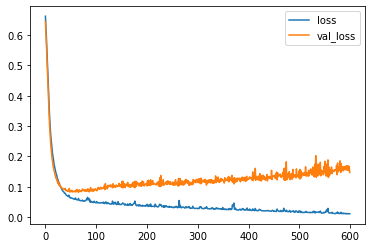

In [28]:
losses.plot()

### Example Two: Using Early Stopping to prevent overfitting

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [33]:
model.fit(x=X_train, y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
         )

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6841 - val_loss: 0.6618
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6551 - val_loss: 0.6327
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6244 - val_loss: 0.6021
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5885 - val_loss: 0.5648
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5503 - val_loss: 0.5251
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5091 - val_loss: 0.4823
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4652 - val_loss: 0.4389
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4218 - val_loss: 0.3926
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3763 - val_loss: 0.3466
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3321 - val_loss: 0.3022
Epoch 11

<AxesSubplot:>

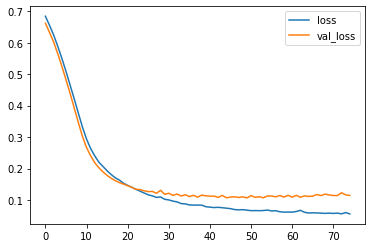

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Example Three: Adding in Dropout Layers

In [36]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [39]:
model.fit(x=X_train, y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop]
         )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7282 - val_loss: 0.6916
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6985 - val_loss: 0.6662
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6783 - val_loss: 0.6483
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6497 - val_loss: 0.6222
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6226 - val_loss: 0.5889
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6055 - val_loss: 0.5566
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5894 - val_loss: 0.5294
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5814 - val_loss: 0.5076
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5386 - val_loss: 0.4790
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5143 - val_loss: 0.4481
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.1041 - val_loss: 0.0885
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.0991
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1127 - val_loss: 0.0927
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 0.0975
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1140 - val_loss: 0.1053
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1131 - val_loss: 0.0870
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1104 - val_loss: 0.0964
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1272 - val_loss: 0.0882
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 0.0920
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1064 - val_loss: 0.0888
Epoch 93/600


<AxesSubplot:>

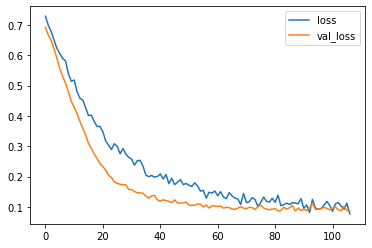

In [41]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Best result so far! 

## Model Evaluation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
pred = (model.predict(X_test) > 0.5).astype("int32")

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [51]:
print(confusion_matrix(y_test, pred))

[[54  1]
 [ 1 87]]
